In [44]:
# --- Libraries ---
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import folium 
from datetime import datetime

from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from folium.plugins import MarkerCluster
from IPython.display import display, HTML


In [2]:
# Set the display option to show all columns
pd.options.display.max_columns = None

# Load the dataset
df = pd.read_csv('zameen.csv')

# Show the first 5 rows
df.head()


,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [3]:
 # Get the number of rows and columns
 df.shape
 print(f"Number of rows: {df.shape[0]}")
 print(f"Number of columns: {df.shape[1]}")

Number of rows: 168446
Number of columns: 20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [5]:
# Check the column names to identify the target variable
print(df.columns)


Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Area Type', 'Area Size', 'Area Category'],
      dtype='object')


In [6]:
# Get data types
print(df.dtypes)

property_id        int64
location_id        int64
page_url          object
property_type     object
price              int64
location          object
city              object
province_name     object
latitude         float64
longitude        float64
baths              int64
area              object
purpose           object
bedrooms           int64
date_added        object
agency            object
agent             object
Area Type         object
Area Size        float64
Area Category     object
dtype: object


In [7]:
# Summary statistics for numerical columns
df.describe()


,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


In [8]:
# Summary statistics for categorical columns

df.describe(include=['object'])


,page_url,property_type,location,city,province_name,area,purpose,date_added,agency,agent,Area Type,Area Category
count,168446,168446,168446,168446,168446,168446,168446,168446,124375,124374,168446,168446
unique,168446,7,1509,5,3,344,2,124,5761,10598,2,22
top,https://www.zameen.com/Property/g_10_g_10_2_gr...,House,DHA Defence,Karachi,Punjab,1 Kanal,For Sale,07-03-2019,Real Investment Consultants,Boez Ayub,Marla,0-5 Marla
freq,1,105468,22046,60484,70536,20061,120655,9485,794,787,137769,64501


In [9]:
 import warnings
 warnings.filterwarnings('ignore')
 warnings.filterwarnings('ignore', category=UserWarning)

In [10]:
# --- Clean the Data ---

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64


In [11]:
# Example of filling missing values with a placeholder
df['agency'].fillna('Unknown', inplace=True)
df['agent'].fillna('Unknown', inplace=True)


In [12]:
# Checking Missing Value after Handling
df.isnull().sum()

property_id      0
location_id      0
page_url         0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
area             0
purpose          0
bedrooms         0
date_added       0
agency           0
agent            0
Area Type        0
Area Size        0
Area Category    0
dtype: int64

In [13]:
# Identify and Handle Inconsistencies

# Strip Leading/Trailing Spaces and Convert to Lowercase
categorical_columns = ['page_url', 'property_type', 'location', 'city', 'province_name', 'area', 'purpose', 'date_added', 'agency', 'agent', 'Area Type', 'Area Category']
for col in categorical_columns:
    df[col] = df[col].str.strip().str.lower()

In [14]:
# Validate 'Price'
df = df[df['price'] > 0]

In [15]:
# Validate 'Latitude' and 'Longitude'
df = df[(df['latitude'].between(-90, 90)) & (df['longitude'].between(-180, 180))]

In [16]:
# Validate 'Baths' and 'Bedrooms'
df = df[df['baths'] >= 0]
df = df[df['bedrooms'] >= 0]

In [17]:
# Checking for duplicate values
duplicates = df.duplicated().sum()
print("Number of Duplicates:" , duplicates)

Number of Duplicates: 0


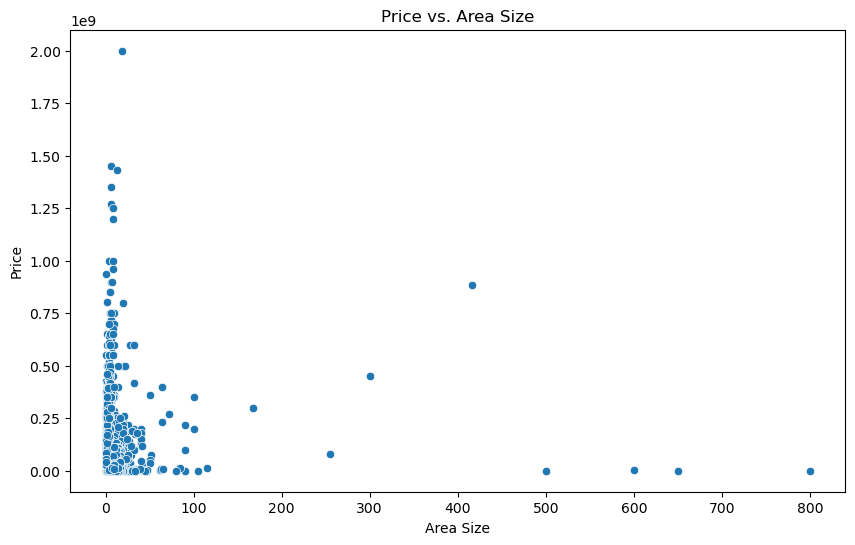

In [18]:
# Outlier Detection and Handling

# Outliers in Price vs Area Size

# Scatter plot to identify outliers in price vs. area size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area Size', y='price', data=df)
plt.title('Price vs. Area Size')
plt.xlabel('Area Size')
plt.ylabel('Price')
plt.show()

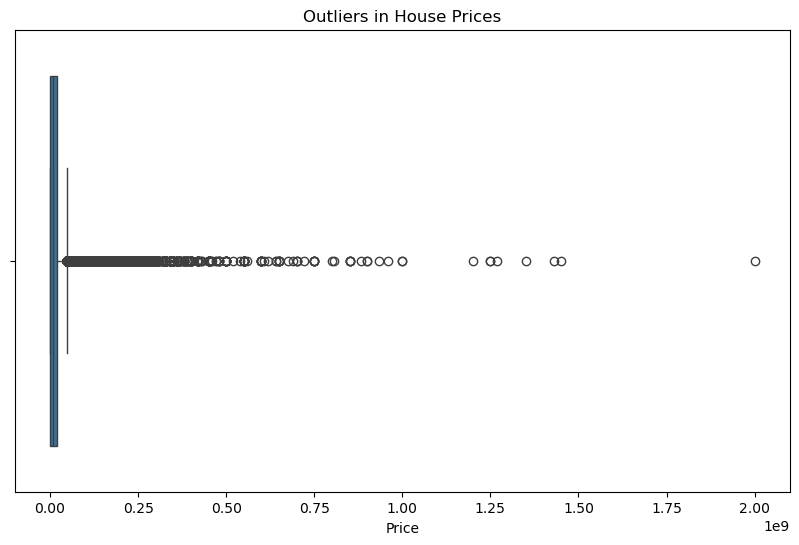

In [19]:
# Outliers in price

# Box plot to visualize outliers in price
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=df)
plt.title('Outliers in House Prices')
plt.xlabel('Price')
plt.show();


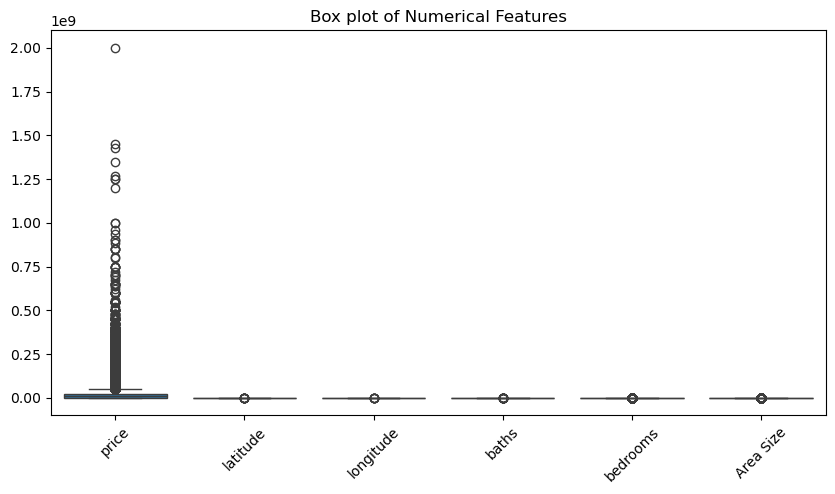

In [20]:
# Outliers in Numerical Features

 # Numerical columns for outlier detection
numerical_columns = ['price', 'latitude', 'longitude', 'baths', 'bedrooms', 'Area Size']

 # Box plot visualization to identify outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numerical_columns])
plt.title('Box plot of Numerical Features')
plt.xticks(rotation=45)
plt.show();


In [21]:
# Statistical Methods for Outlier Detection and Handling

# Calculate IQR 
Q1 = df['price'].quantile(0.25) 
Q3 = df['price'].quantile(0.75) 
IQR = Q3 - Q1
 # Define Outlier Boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
 # Identify outliers
outliers = (df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)
 # Count outliers for each numerical column
outliers_count = outliers.sum()
print("Number of Outliers:")
print(outliers_count)

Number of Outliers:
price        13547
latitude         0
longitude        0
baths            0
bedrooms         0
Area Size        0
dtype: int64


In [22]:
# Handling Outliers

# Winsorize numerical columns
df['price'] = winsorize(df['price'], limits=[0.01, 0.01])
df['latitude'] = winsorize(df['latitude'], limits=[0.05, 0.05])
df['longitude'] = winsorize(df['longitude'], limits=[0.05, 0.05])
df['baths'] = winsorize(df['baths'], limits=[0.05, 0.05])
df['bedrooms'] = winsorize(df['bedrooms'], limits=[0.05, 0.05])
df['Area Size'] = winsorize(df['Area Size'], limits=[0.05, 0.05])

In [23]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'price'
Q1_price = df['price'].quantile(0.25) 
Q3_price = df['price'].quantile(0.75) 
IQR_price = Q3_price - Q1_price

# Define the upper and lower bounds for outlier detection
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Calculate the mean of 'price'
mean_price = df['price'].mean()

# Replace outliers with the mean 
df.loc[df['price'] > upper_bound_price, 'price'] = mean_price
df.loc[df['price'] < lower_bound_price, 'price'] = mean_price


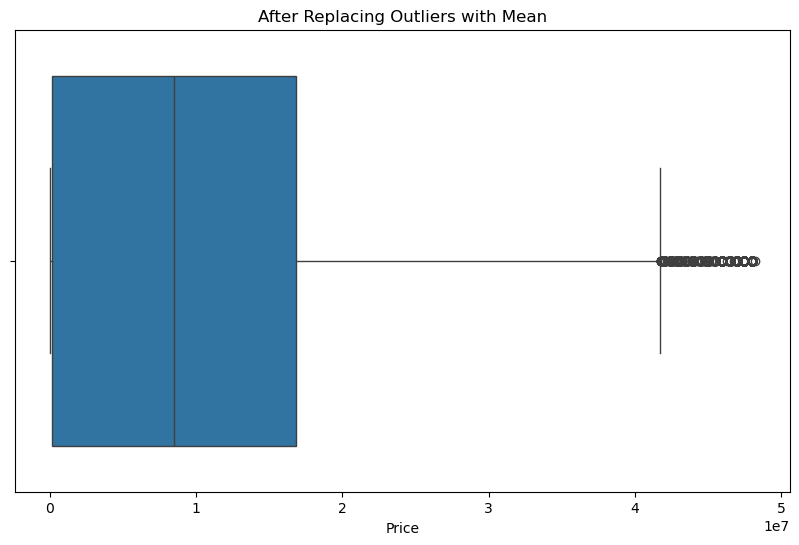

In [24]:
 # Box plot to visualize outliers in price after outliers handling
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=df)
plt.title('After Replacing Outliers with Mean')
plt.xlabel('Price')
plt.show();

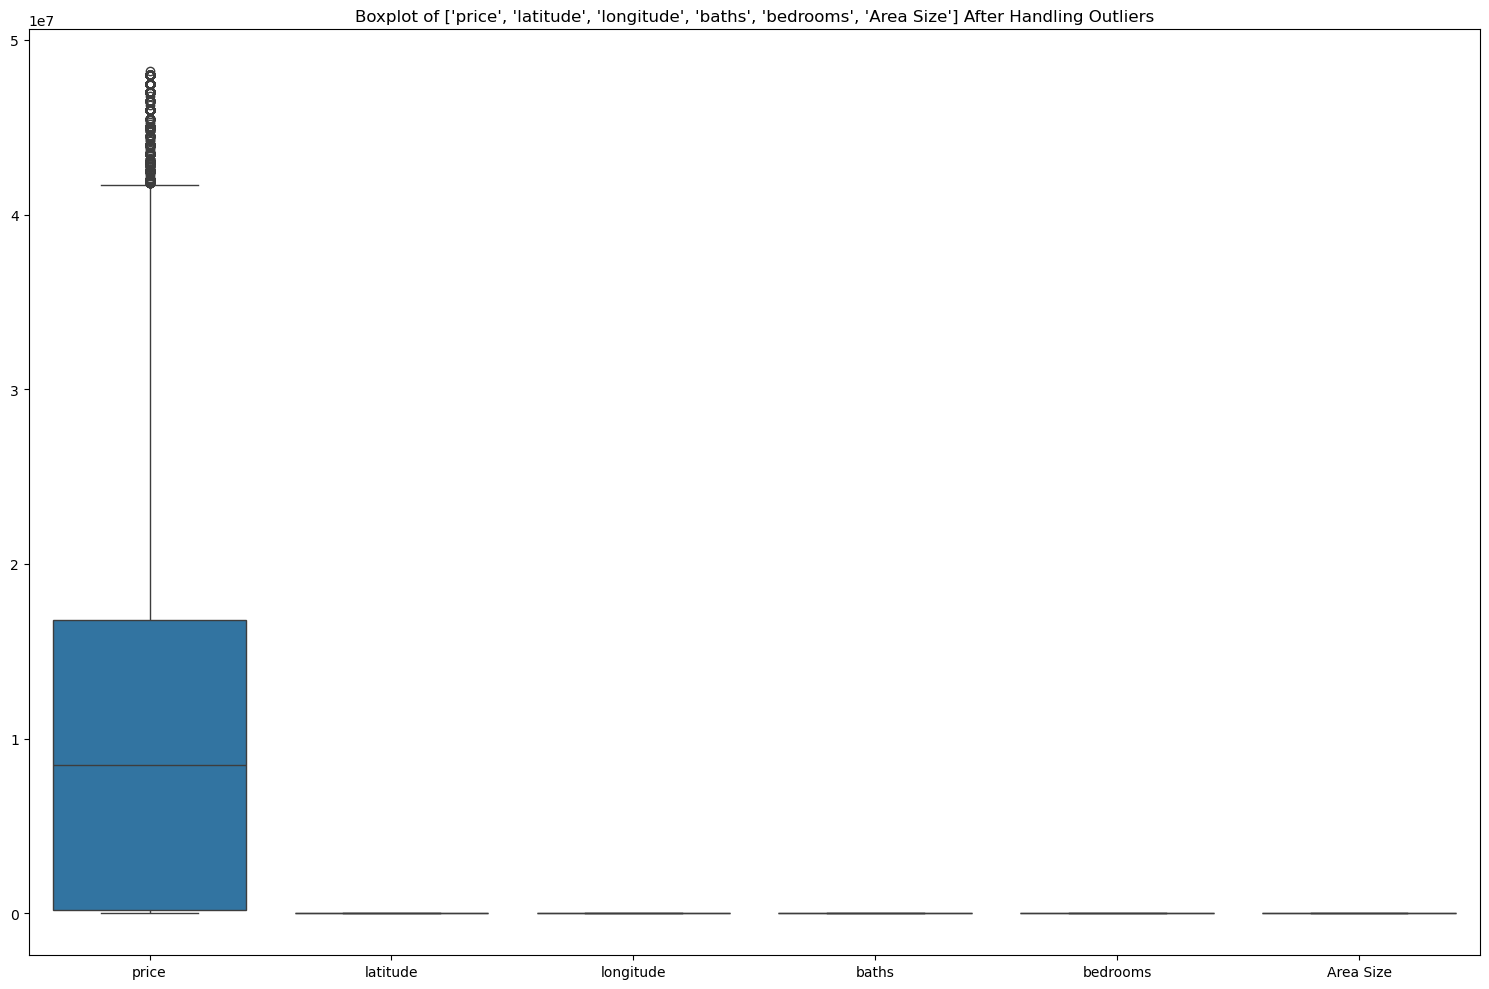

In [25]:
 # Visualize numerical columns after handling outliers
 plt.figure(figsize=(15, 10))
 sns.boxplot(df[numerical_columns])
 plt.title(f'Boxplot of {numerical_columns} After Handling Outliers')
 plt.tight_layout()
 plt.show();


In [26]:
# Outliers After Handling

# Create a mask for outliers using NumPy operations
outliers_post = (df[numerical_columns] < lower_bound_price) | (df[numerical_columns] > upper_bound_price)
 # Count outliers for each numerical column
outliers_count_post = outliers_post.sum()
 # Print the number of outliers after handling
print("Number of Outliers After Handling:")
print(outliers_count_post)

Number of Outliers After Handling:
price        0
latitude     0
longitude    0
baths        0
bedrooms     0
Area Size    0
dtype: int64


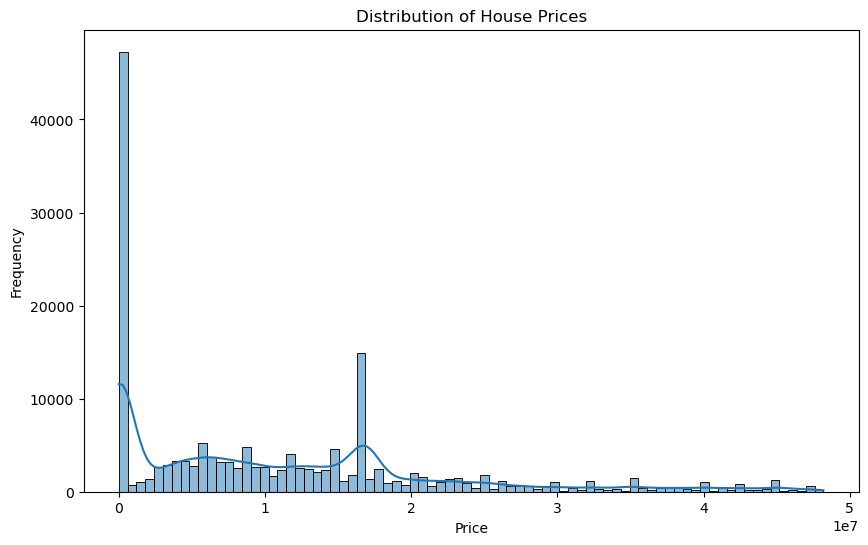

In [27]:
# --- Data Exploration ---

# Analyze the Distribution of House Prices

# Histogram and KDE Plot for Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show();

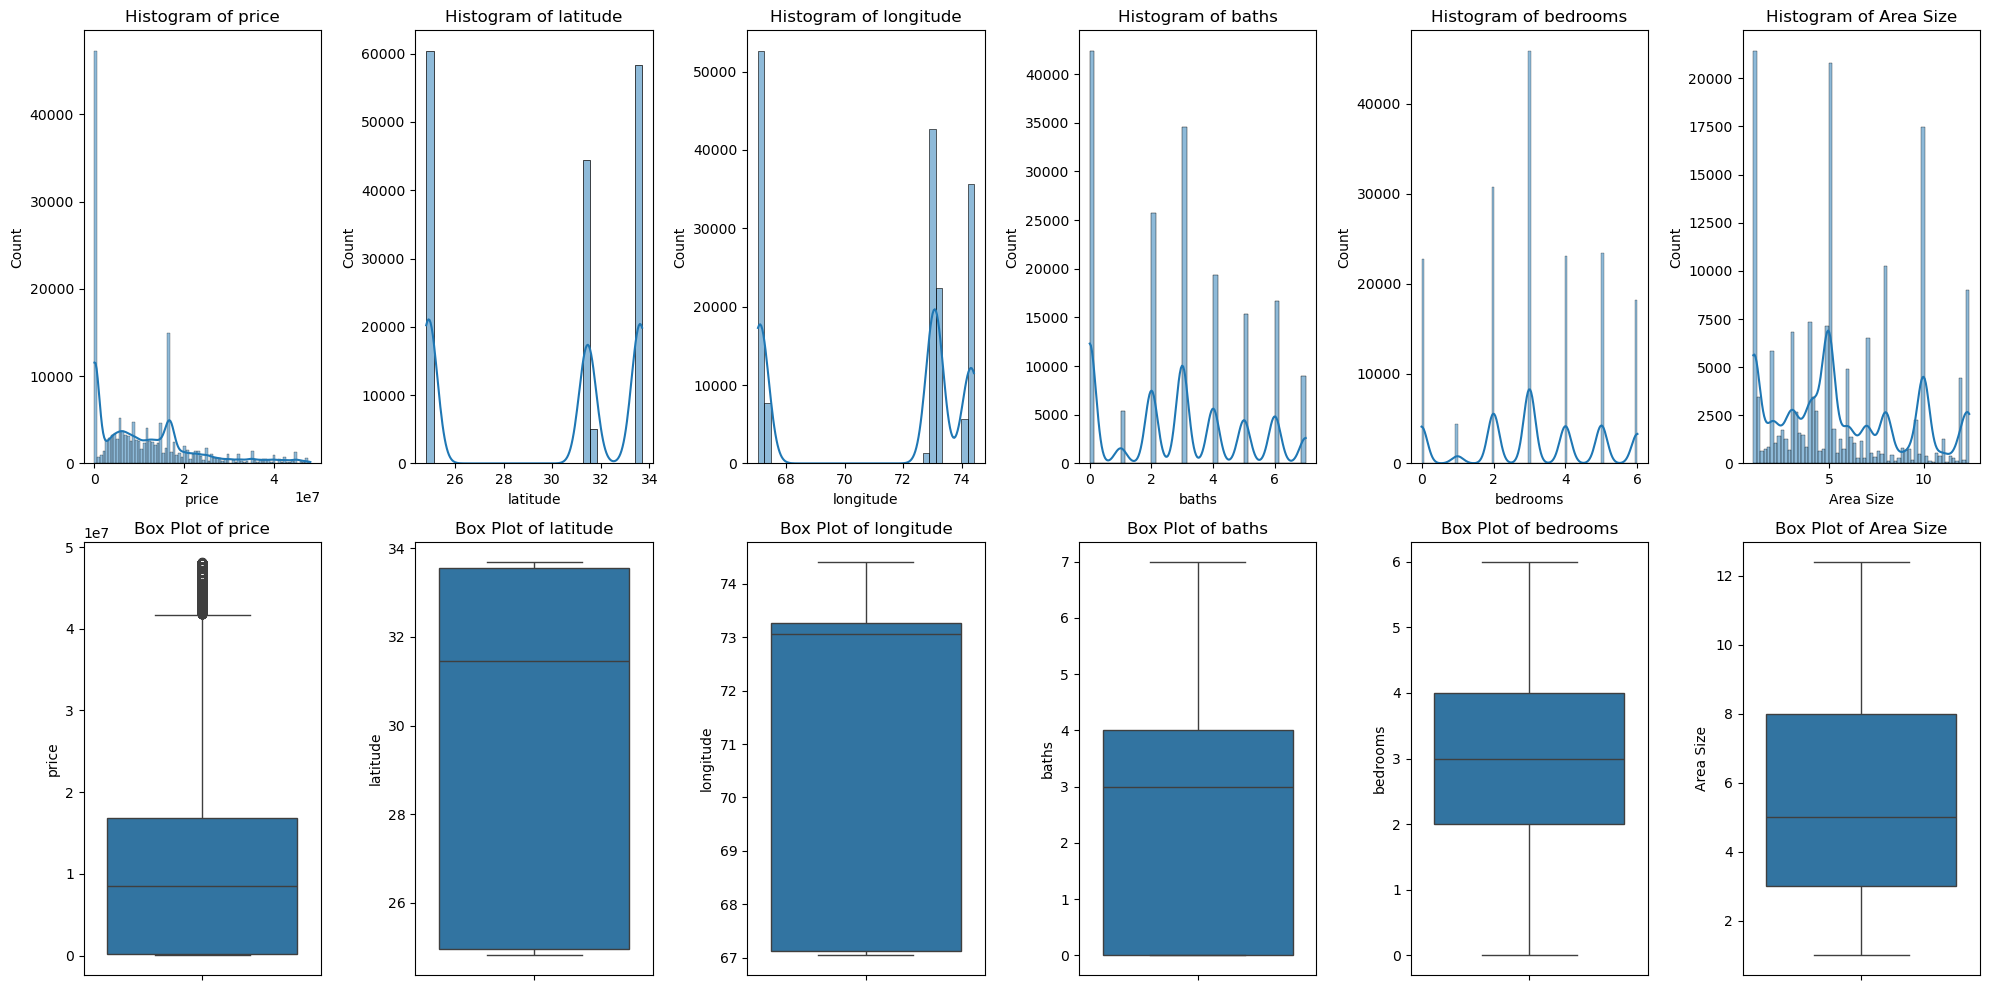

In [28]:
# Histograms and Box Plots for Numerical Features
numerical_columns = ['price', 'latitude', 'longitude', 'baths', 'bedrooms', 'Area Size']
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, len(numerical_columns), i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.subplot(2, len(numerical_columns), len(numerical_columns) + i)
    sns.boxplot(df[col])
    plt.title(f'Box Plot of {col}')
 
plt.tight_layout()
plt.show();


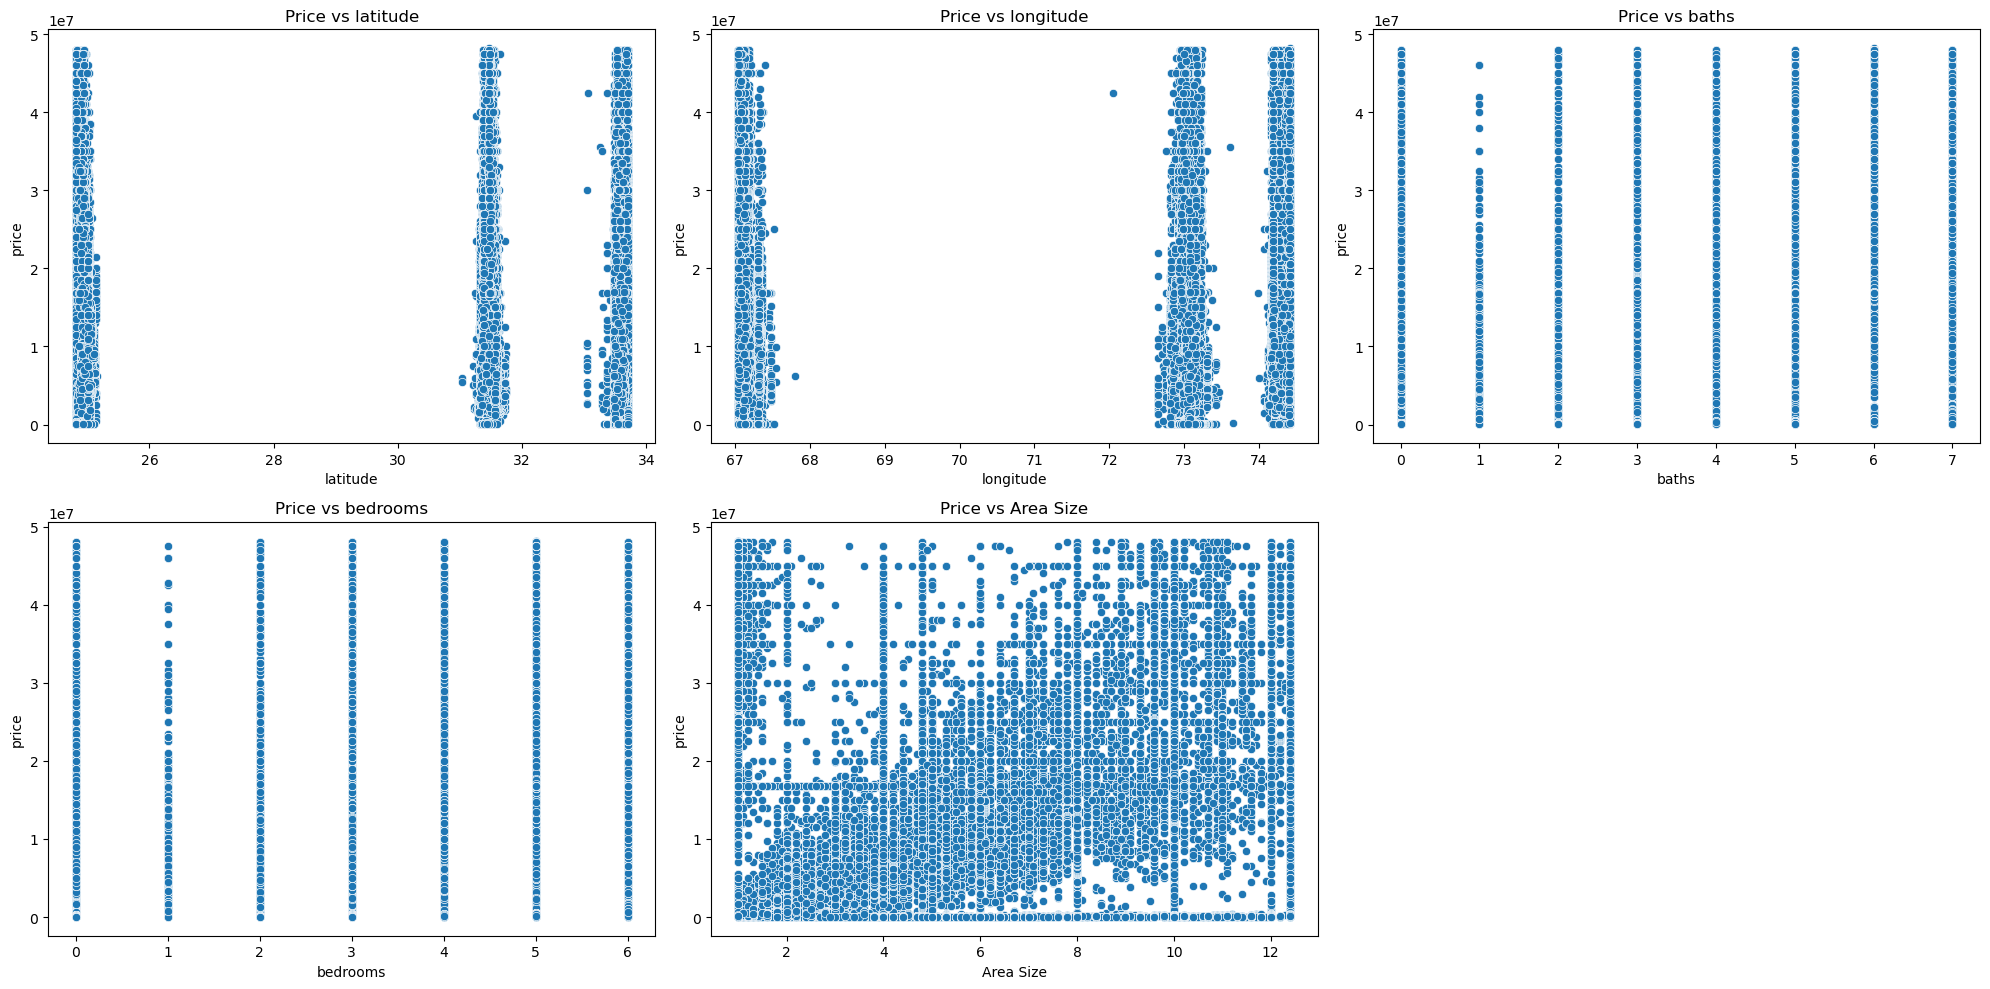

In [29]:
# Scatter Plots for Numerical Features vs. Price
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_columns[1:], 1): # Exclude 'price' from the loop
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[col], y=df['price'])
    plt.title(f'Price vs {col}')
plt.tight_layout()
plt.show();

In [30]:
# Bar Plots for Categorical Features vs. Price

# Remove leading/trailing whitespace and standardize case
df['agency'] = df['agency'].str.strip().str.title()

# Handle missing values (optional)
df['agency'].fillna('Unknown', inplace=True)

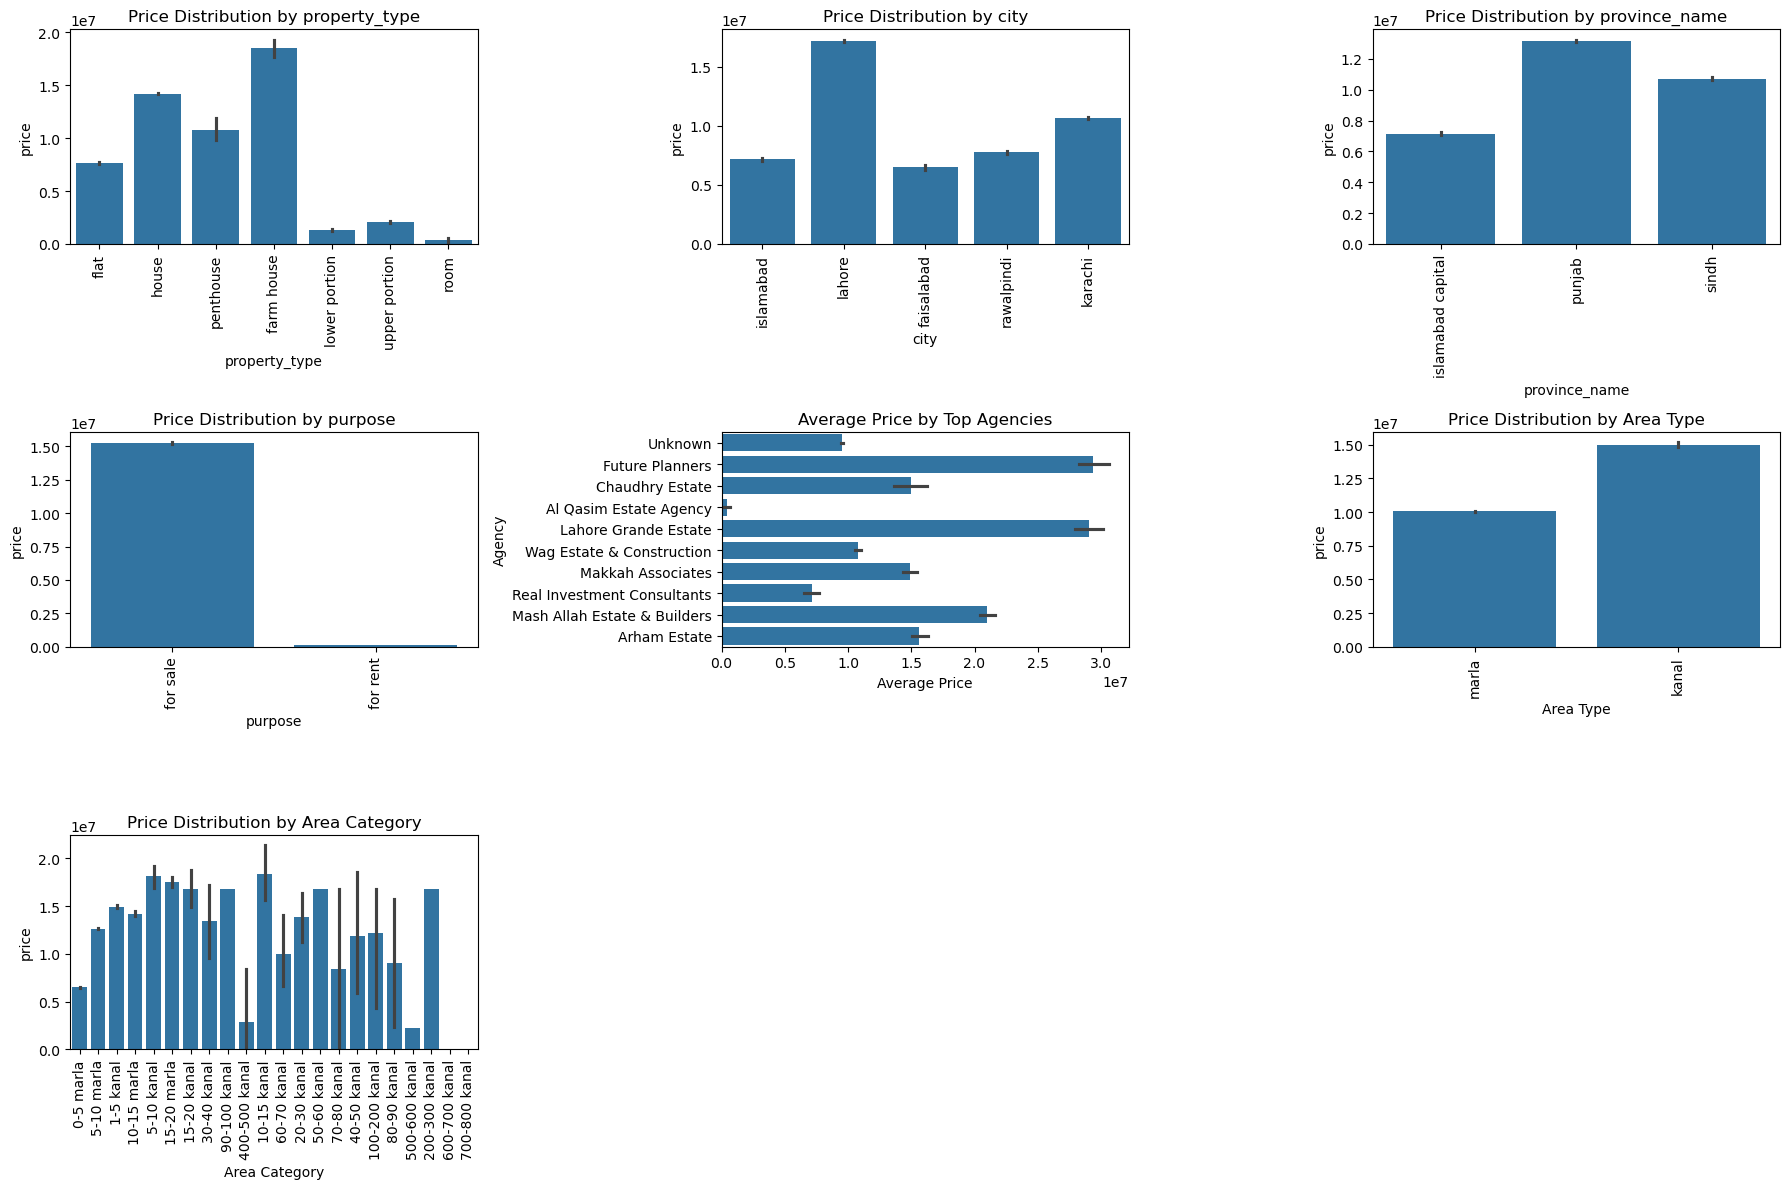

In [31]:
# Define categorical columns
categorical_columns = ['property_type', 'city', 'province_name', 'purpose', 'agency', 'Area Type', 'Area Category']

# Create bar plots for categorical features vs. price
plt.figure(figsize=(18, 12))  # Adjust figure size to accommodate all subplots

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)  # Use a 3x3 grid
    if col == 'agency':
        # Special handling for 'agency'
        top_agencies = df['agency'].value_counts().head(10).index
        filtered_df = df[df['agency'].isin(top_agencies)]
        sns.barplot(x='price', y='agency', data=filtered_df, estimator='mean')
        plt.title('Average Price by Top Agencies')
        plt.xlabel('Average Price')
        plt.ylabel('Agency')
    else:
        # For other categorical columns
        sns.barplot(x=df[col], y=df['price'], estimator='mean')
        plt.xticks(rotation=90)
        plt.title(f'Price Distribution by {col}')

plt.tight_layout()
plt.show();


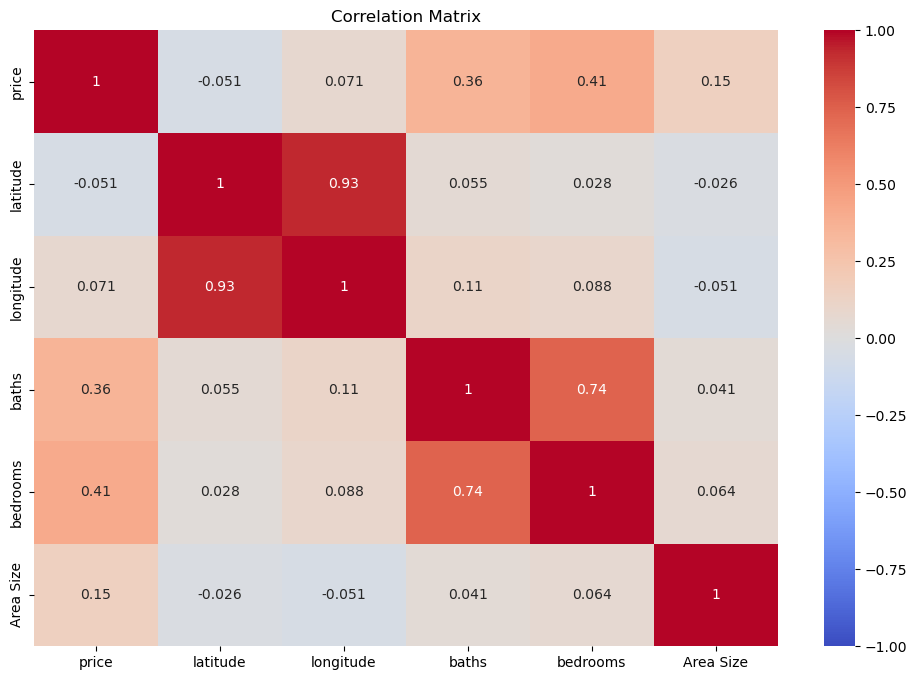

In [32]:
# Correlation Analysis
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show();

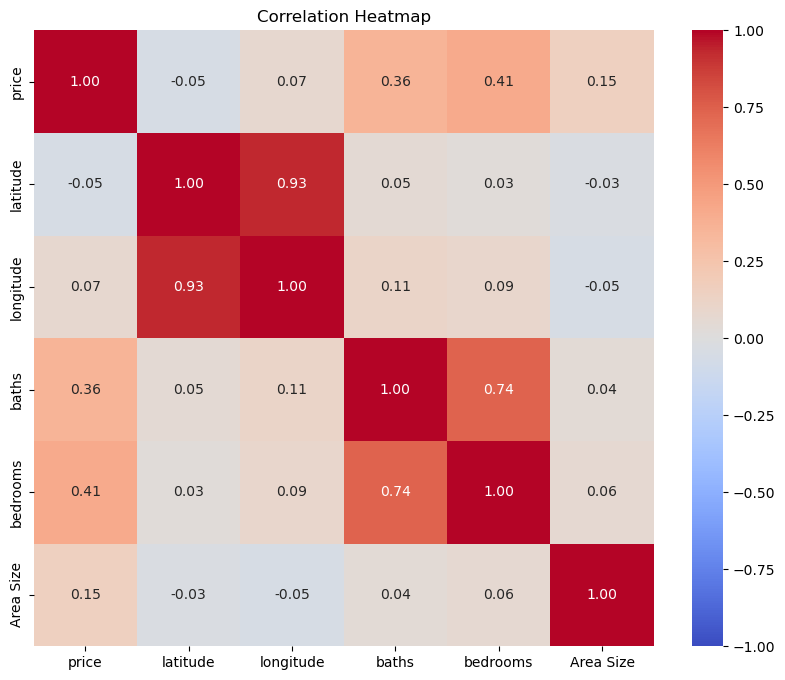

In [33]:
 # Calculate correlation matrix
corr_matrix = df[numerical_columns].corr()

 # Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show();


In [34]:
 # Visualization of Geographical Data
 
# Calculate the mean latitude and longitude
 mean_lat = df['latitude'].mean()
 mean_lon = df['longitude'].mean()
 # Create a map centered at the mean latitude and longitude
 m = folium.Map(location=[mean_lat, mean_lon], zoom_start=6)
 # Add a marker cluster to the map
 marker_cluster = MarkerCluster().add_to(m)
 # Add markers to the cluster
 sample_df = df.sample(n=500, random_state=42)  # Adjust number as needed
 for _, row in sample_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Price: {row['price']}, Beds: {row['bedrooms']}, Baths: {row['baths']}"
    ).add_to(marker_cluster)
 # Save the map to an HTML file
 map_filename = 'house_price_map.html'
 m.save(map_filename)

In [35]:
# --- Feature Engineering ---

# Create New Features

# Age of the House

from datetime import datetime
# Extract the year from 'date_added' and calculate the age
current_year = datetime.now().year
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['house_age'] = current_year - df['date_added'].dt.year // 365
# Handle any possible errors due to 'date_added' conversion by filling NaN with median age
df['house_age'].fillna(df['house_age'].median(), inplace=True)
df["price_per_sqft"] = df["price"] / (df["Area Size"] + 1)  


In [36]:
# Ensure 'date_added' is in datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract Year, Month, Day from date_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day
df['weekday_added'] = df['date_added'].dt.weekday  # Monday=0, Sunday=6

# Optional: drop the original date column
df.drop(columns=['date_added'], inplace=True)

# Preview
df[['year_added', 'month_added', 'day_added', 'weekday_added']].head()


,year_added,month_added,day_added,weekday_added
0,2019,2,4,0
1,2019,5,4,5
2,2019,7,17,2
3,2019,4,5,4
4,2019,7,10,2


In [37]:
# Function to convert area measurements to square feet
def convert_area(area):
    if isinstance(area, str):
        area = area.replace(',', '')
        if 'Marla' in area:
# Remove commas from the string
            value = float(area.split()[0])
            return value * 272.25
        elif 'Kanal' in area:
            value = float(area.split()[0])
            return value * 20 * 272.25
        elif 'Square Feet' in area:
            value = float(area.split()[0])
            return value
    return area
# Apply the conversion function to the 'area' column
df['area'] = df['area'].apply(convert_area)

In [38]:
# Convert area to string first
df['area'] = df['area'].astype(str).str.lower().str.strip()

# Remove unit keywords safely
df['area'] = df['area'].str.replace(' marla', '', regex=False)
df['area'] = df['area'].str.replace(' kanal', '', regex=False)
df['area'] = df['area'].str.replace(',', '').str.strip()

# Attempt to convert to float, invalid strings will become NaN
df['area'] = pd.to_numeric(df['area'], errors='coerce')

# Check conversion
print(df['area'].head(10))

0    4.0
1    5.6
2    8.0
3    2.0
4    8.0
5    1.6
6    1.0
7    6.2
8    1.0
9    1.0
Name: area, dtype: float64


In [39]:
# Calculate price per square foot
df['price_per_sqft'] = df['price'] / df['area']

In [40]:
# Create a new feature: number of bedrooms per floor
df['bedrooms_per_floor'] = df['bedrooms'] / df['area']

# Handle any possible errors due to division by zero or NaN values
df['bedrooms_per_floor'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['bedrooms_per_floor'].fillna(df['bedrooms_per_floor'].median(), inplace=True)

In [41]:
# Create a new feature: number of bathrooms per bedroom
df['baths_per_bedroom'] = df['baths'] / df['bedrooms']

# Handle any possible errors due to division by zero or NaN values
df['baths_per_bedroom'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['baths_per_bedroom'].fillna(df['baths_per_bedroom'].median(), inplace=True)

In [42]:
# Check if the new features are created
print(df.columns)

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'agency', 'agent', 'Area Type',
       'Area Size', 'Area Category', 'house_age', 'price_per_sqft',
       'year_added', 'month_added', 'day_added', 'weekday_added',
       'bedrooms_per_floor', 'baths_per_bedroom'],
      dtype='object')


In [43]:
# Display new features
print(df[['house_age', 'bedrooms_per_floor', 'baths_per_bedroom']].head())

   house_age  bedrooms_per_floor  baths_per_bedroom
0       2020            0.500000                1.0
1       2020            0.535714                1.0
2       2020            0.625000                1.2
3       2020            2.000000                1.0
4       2020            0.375000                1.0


In [45]:
# Encode Categorical Features

# One-Hot Encoding

# List of categorical columns to encode
categorical_columns = [
'property_type', 'location', 'city',
'province_name', 'purpose', 'agency',
'agent', 'Area Type', 'Area Category'
]
# Perform one-hot encoding on the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

nominal_features = ['city', 'province_name', 'purpose']

# Apply OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), nominal_features)
    ],
    remainder='passthrough'  # keep other columns as they are
)

In [46]:
# Display only the first 5 rows and first 10 columns
print(df_encoded.iloc[:5, :10])


   property_id  location_id  \
0       237062         3325   
1       346905         3236   
2       386513          764   
3       656161          340   
4       841645         3226   

                                            page_url       price   latitude  \
0  https://www.zameen.com/property/g_10_g_10_2_gr...  10000000.0  33.679890   
1  https://www.zameen.com/property/e_11_2_service...   6900000.0  33.698137   
2  https://www.zameen.com/property/islamabad_g_15...  16500000.0  33.631486   
3  https://www.zameen.com/property/islamabad_bani...  43500000.0  33.698137   
4  https://www.zameen.com/property/dha_valley_dha...   7000000.0  33.492591   

   longitude  baths  area  bedrooms  Area Size  
0  73.012640      2   4.0         2        4.0  
1  72.971492      3   5.6         3        5.6  
2  72.926559      6   8.0         5        8.0  
3  73.151199      4   2.0         4        2.0  
4  73.301339      3   8.0         3        8.0  


In [47]:

numeric_features = ['Area Size', 'baths', 'bedrooms']
categorical_features = ['city', 'province_name', 'purpose']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


In [49]:
# Save the dataset with new features
df.to_csv('new_features_dataset.csv', index=False)

In [50]:
# Outlier Analysis

# Calculate Z-scores for 'price'
df['price_zscore'] = zscore(df['price'])

# Define a threshold for identifying outliers (e.g., z-score greater than 3 or less than -3)
outliers_high = df[df['price_zscore'] > 3]
outliers_low = df[df['price_zscore'] < -3]

# Display the number of outliers
print("Number of High Price Outliers:", len(outliers_high))
print("Number of Low Price Outliers:", len(outliers_low))

Number of High Price Outliers: 2528
Number of Low Price Outliers: 0


In [51]:
# Investigate Outliers

# Print Information About High Price Outliers
print("High Price Outliers:")
print(outliers_high[['property_id', 'price', 'location', 'area', 'bedrooms', 'baths', 'house_age']])

High Price Outliers:
        property_id       price            location  area  bedrooms  baths  \
11          1586658  48000000.0  diplomatic enclave   7.8         2      2   
23          2682075  47000000.0  diplomatic enclave   8.4         3      2   
67          2311887  45000000.0              askari   1.0         5      6   
91          3463063  47500000.0         eme society   1.0         0      0   
171         2478189  45000000.0         bath island   8.9         3      0   
...             ...         ...                 ...   ...       ...    ...   
168247     17354062  45000000.0         bahria town   1.0         6      6   
168302     17353521  45000000.0       super highway  40.0         0      0   
168357     17355045  47500000.0         dha defence   1.0         5      6   
168375     17355743  45000000.0         dha defence   1.0         5      6   
168382     17356163  45000000.0         dha defence   1.0         5      5   

        house_age  
11           2020  
23

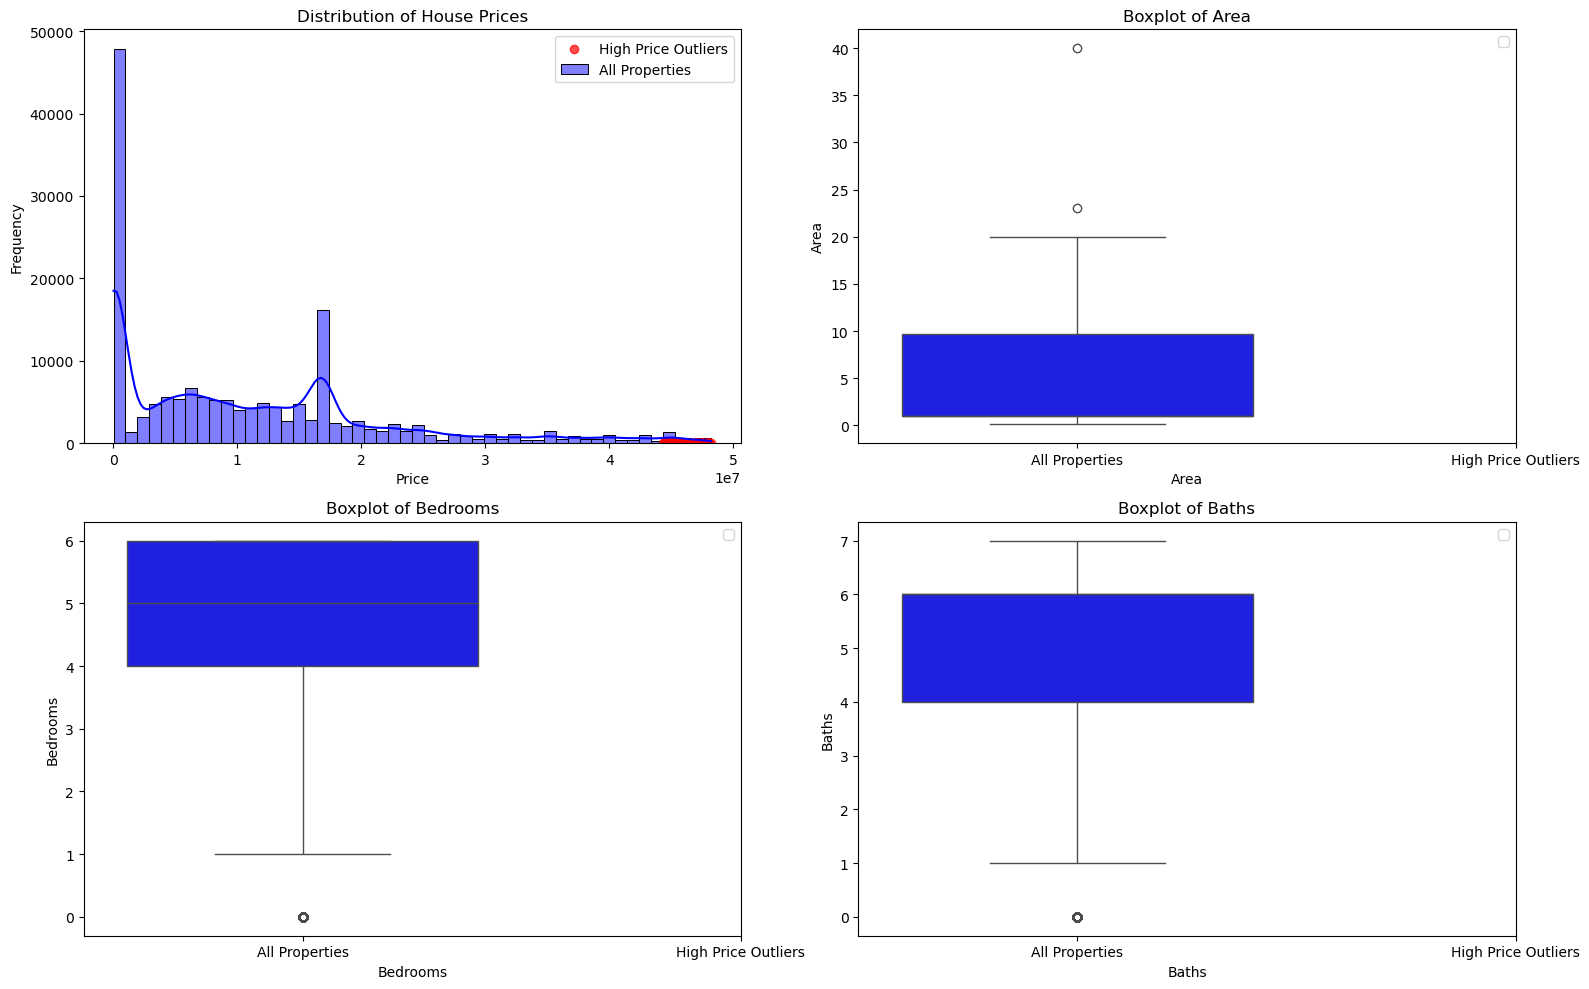

In [52]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Plot titles
plot_titles = [
    'Distribution of House Prices',
    'Boxplot of Area',
    'Boxplot of Bedrooms',
    'Boxplot of Baths'
]

# Data and plot configs
plot_data = [
    (df['price'], outliers_high['price'], 'Price', 'blue', 'red', 'Frequency'),
    (df['area'], outliers_high['area'], 'Area', 'blue', 'red', 'Area'),
    (df['bedrooms'], outliers_high['bedrooms'], 'Bedrooms', 'blue', 'red', 'Bedrooms'),
    (df['baths'], outliers_high['baths'], 'Baths', 'blue', 'red', 'Baths')
]

# Create subplots
for i, (data_all, data_outliers, feature_name, color_all, color_outliers, y_label) in enumerate(plot_data):
    plt.subplot(2, 2, i+1)

    if feature_name == 'Price':
        sns.histplot(data_all, kde=True, bins=50, color=color_all, label='All Properties')
        plt.scatter(data_outliers, [0] * len(data_outliers), color=color_outliers, label='High Price Outliers', alpha=0.7)
    else:
        sns.boxplot(data=[data_all, data_outliers], palette=[color_all, color_outliers])
        plt.xticks([0, 1], ['All Properties', 'High Price Outliers'])

    plt.title(plot_titles[i])
    plt.xlabel(feature_name)
    plt.ylabel(y_label)
    plt.legend()

plt.tight_layout()
plt.show()

In [53]:
# Compare Summary Statistics

# Summary statistics for key features
summary_stats_all = df[['area', 'bedrooms', 'baths', 'house_age']].describe()
summary_stats_outliers = outliers_high[['area', 'bedrooms', 'baths', 'house_age']].describe()
print("Summary Statistics for All Properties:")
print(summary_stats_all)
print("\nSummary Statistics for High Price Outliers:")
print(summary_stats_outliers)

Summary Statistics for All Properties:
                area       bedrooms          baths  house_age
count  168443.000000  168443.000000  168443.000000   168443.0
mean        6.017572       3.100224       2.835707     2020.0
std        23.644461       1.777040       2.177108        0.0
min         0.000000       0.000000       0.000000     2020.0
25%         3.000000       2.000000       0.000000     2020.0
50%         5.000000       3.000000       3.000000     2020.0
75%         8.000000       4.000000       4.000000     2020.0
max      6222.200000       6.000000       7.000000     2020.0

Summary Statistics for High Price Outliers:
              area     bedrooms        baths  house_age
count  2528.000000  2528.000000  2528.000000     2528.0
mean      4.821282     4.641218     4.712025     2020.0
std       5.510279     1.577391     2.366528        0.0
min       0.100000     0.000000     0.000000     2020.0
25%       1.000000     4.000000     4.000000     2020.0
50%       1.000000    

In [54]:
# Analyze Feature Contributions

# Correlation matrix for outliers
corr_outliers_high = outliers_high[['price', 'house_age', 'bedrooms', 'area', 'baths', 'price_per_sqft']]
print("Correlation Matrix for High Price Outliers:")
print(corr_outliers_high)

Correlation Matrix for High Price Outliers:
             price  house_age  bedrooms  area  baths  price_per_sqft
11      48000000.0       2020         2   7.8      2    6.153846e+06
23      47000000.0       2020         3   8.4      2    5.595238e+06
67      45000000.0       2020         5   1.0      6    4.500000e+07
91      47500000.0       2020         0   1.0      0    4.750000e+07
171     45000000.0       2020         3   8.9      0    5.056180e+06
...            ...        ...       ...   ...    ...             ...
168247  45000000.0       2020         6   1.0      6    4.500000e+07
168302  45000000.0       2020         0  40.0      0    1.125000e+06
168357  47500000.0       2020         5   1.0      6    4.750000e+07
168375  45000000.0       2020         5   1.0      6    4.500000e+07
168382  45000000.0       2020         5   1.0      5    4.500000e+07

[2528 rows x 6 columns]


In [55]:
# Investigate Specific Cases

# Manual inspection of extreme outliers
extreme_outliers_high = outliers_high.sort_values(by='price', ascending=False).head(10)
print("Extreme High Price Outliers:")
print(extreme_outliers_high[['price', 'house_age', 'bedrooms', 'area', 'baths', 'price_per_sqft']])

Extreme High Price Outliers:
            price  house_age  bedrooms  area  baths  price_per_sqft
67593  48200000.0       2020         5   1.0      6    4.820000e+07
11     48000000.0       2020         2   7.8      2    6.153846e+06
60696  48000000.0       2020         5   1.0      7    4.800000e+07
68283  48000000.0       2020         5   1.0      6    4.800000e+07
67379  48000000.0       2020         5   1.0      6    4.800000e+07
67059  48000000.0       2020         3   8.0      2    6.000000e+06
65447  48000000.0       2020         5   1.0      7    4.800000e+07
63636  48000000.0       2020         5   1.0      6    4.800000e+07
63075  48000000.0       2020         2   8.7      3    5.517241e+06
62660  48000000.0       2020         5   1.0      7    4.800000e+07


In [56]:
# Predictive Modeling

# Define features and target
features = ['area', 'bedrooms', 'baths', 'house_age', 'latitude', 'longitude']
target = 'price'
X = df[features]
y = df[target]


In [57]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [59]:
# Make predictions
y_pred_lr = lr_model.predict(X_test)
# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression Performance:")
print("Mean Absolute Error:", mae_lr)
print("Mean Squared Error:", mse_lr)
print("R-squared:", r2_lr)

Linear Regression Performance:
Mean Absolute Error: 7116456.860901745
Mean Squared Error: 92343645785081.58
R-squared: 0.24735666180287808


In [60]:
# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [61]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)
# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Performance:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

Random Forest Performance:
Mean Absolute Error: 4167235.890500138
Mean Squared Error: 50536504103794.57
R-squared: 0.5881041643296552


In [62]:
# Train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [63]:
# Make predictions
y_pred_gb = gb_model.predict(X_test)
# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Performance:")
print("Mean Absolute Error:", mae_gb)
print("Mean Squared Error:", mse_gb)
print("R-squared:", r2_gb)

Gradient Boosting Performance:
Mean Absolute Error: 5661249.2130811745
Mean Squared Error: 63710741138488.59
R-squared: 0.4807280513801039


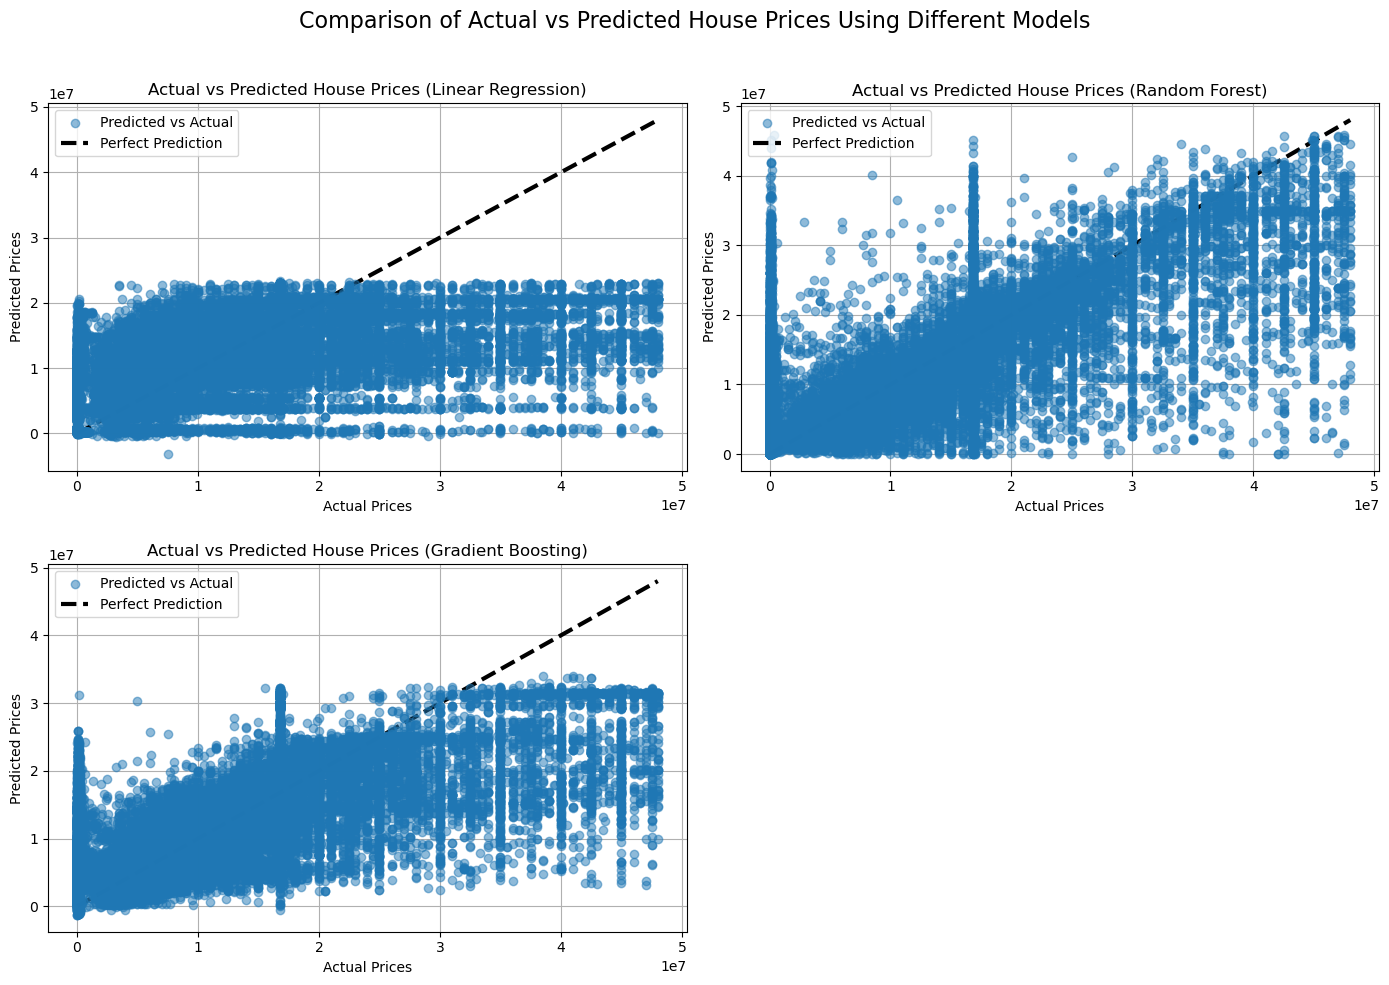

In [66]:
#  Comparison of Actual vs Predicted House Prices

# Function to create scatter plot for a given model
def plot_predicted_vs_actual(ax, y_test, y_pred, model_name):
    ax.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual', zorder=3)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Perfect Prediction')
    ax.set_xlabel('Actual Prices')
    ax.set_ylabel('Predicted Prices')
    ax.set_title(f'Actual vs Predicted House Prices ({model_name})')
    ax.legend()
    ax.grid(True, zorder=1)

# Set up the figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot for Linear Regression
plot_predicted_vs_actual(axs[0, 0], y_test, y_pred_lr, 'Linear Regression')

# Plot for Random Forest
plot_predicted_vs_actual(axs[0, 1], y_test, y_pred_rf, 'Random Forest')

# Plot for Gradient Boosting
plot_predicted_vs_actual(axs[1, 0], y_test, y_pred_gb, 'Gradient Boosting')

# Hide the empty subplot in the bottom right corner
axs[1, 1].axis('off')

# Add a main title for the whole figure
fig.suptitle('Comparison of Actual vs Predicted House Prices Using Different Models', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [67]:
# Future Prediction

# Define the function to predict prices
def predict_prices(hypothetical_data, lr_model, rf_model, gb_model):
    # Create a DataFrame with hypothetical scenarios
    df_hypothetical = pd.DataFrame(hypothetical_data)
    
    # Use trained models to predict prices for hypothetical scenarios
    predicted_prices_lr = lr_model.predict(df_hypothetical)
    predicted_prices_rf = rf_model.predict(df_hypothetical)
    predicted_prices_gb = gb_model.predict(df_hypothetical)
    
    return predicted_prices_lr, predicted_prices_rf, predicted_prices_gb

# Define the hypothetical scenarios (adjust as per your data structure)
hypothetical_data = {
    'area': [3000, 1800, 2200],            # in square feet
    'bedrooms': [5, 3, 4],
    'baths': [4, 2, 3],
    'house_age': [12, 7, 9],
    'latitude': [32.7767, 34.0522, 35.6895],
    'longitude': [96.7970, 118.2437, 139.6917]
}

# Call the function with the hypothetical data and trained models
predicted_prices_lr, predicted_prices_rf, predicted_prices_gb = predict_prices(
    hypothetical_data, lr_model, rf_model, gb_model
)

# Display the predicted prices
print("Linear Regression Predictions:", predicted_prices_lr)
print("Random Forest Predictions:", predicted_prices_rf)
print("Gradient Boosting Predictions:", predicted_prices_gb)


Linear Regression Predictions: [1.12633155e+08 1.44456172e+08 2.03170058e+08]
Random Forest Predictions: [19336051.51550258 15480328.65417382 17043735.35400344]
Gradient Boosting Predictions: [23997111.70443544 14981584.86644521 23642231.93871661]


In [68]:
# Create a DataFrame with hypothetical scenarios
df_hypothetical = pd.DataFrame(hypothetical_data)
# Use trained models to predict prices for hypothetical scenarios
predicted_prices_lr = lr_model.predict(df_hypothetical)
predicted_prices_rf = rf_model.predict(df_hypothetical)
predicted_prices_gb = gb_model.predict(df_hypothetical)
# Combine predictions into a DataFrame for easier plotting
predictions = pd.DataFrame({

'Scenario': ['Scenario 1', 'Scenario 2', 'Scenario 3'],
'Linear Regression': predicted_prices_lr,
'Random Forest': predicted_prices_rf,
'Gradient Boosting': predicted_prices_gb
    })

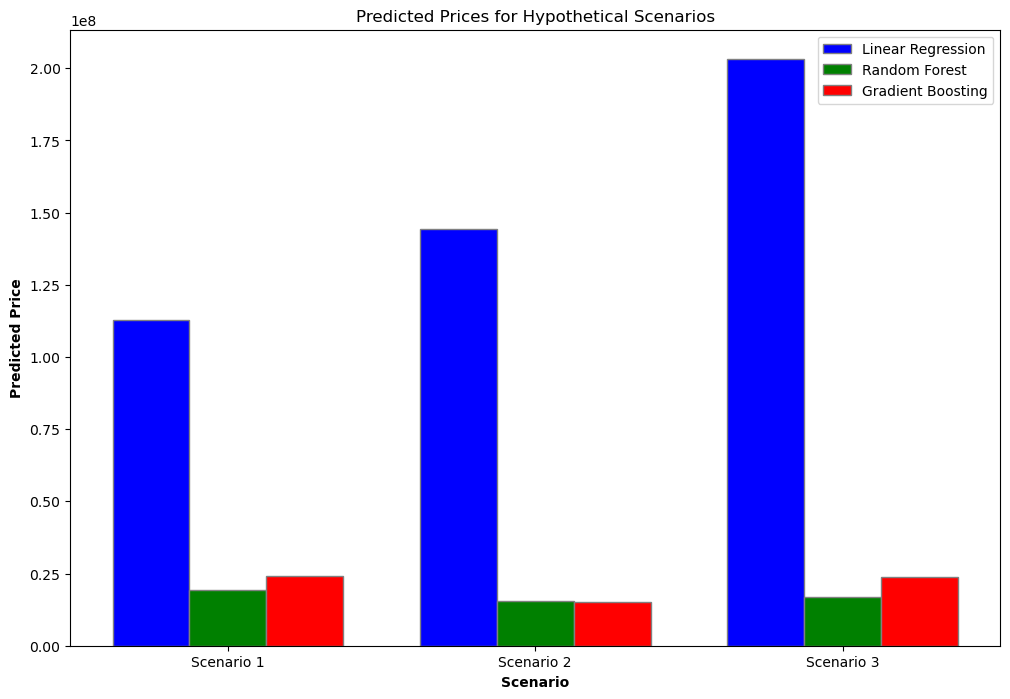

In [69]:
# Set the plot size and bar width
plt.figure(figsize=(12, 8))
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(predictions['Scenario']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bars for each model
plt.bar(r1, predictions['Linear Regression'], color='blue',
        width=bar_width, edgecolor='grey', label='Linear Regression')
plt.bar(r2, predictions['Random Forest'], color='green',
        width=bar_width, edgecolor='grey', label='Random Forest')
plt.bar(r3, predictions['Gradient Boosting'], color='red',
        width=bar_width, edgecolor='grey', label='Gradient Boosting')

# Add labels and title
plt.xlabel('Scenario', fontweight='bold')
plt.ylabel('Predicted Price', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(predictions['Scenario']))], predictions['Scenario'])
plt.title('Predicted Prices for Hypothetical Scenarios')

# Add legend
plt.legend()

# Show the plot
plt.show()
